In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lets load the california House Pricing Dataset

In [157]:
from sklearn.datasets import fetch_california_housing

In [158]:
california= fetch_california_housing()


In [159]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [160]:
## Lets check the description of the dataset
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [161]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [162]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [163]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing The Dataset

In [164]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)

In [165]:
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [166]:
dataset['Price']=california.target

In [167]:
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [168]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [169]:
## Summarizing The Stats of the data
print(dataset.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [170]:
## Check the missing Values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [171]:
# import numpy as np
# import pandas as pd

# Load your dataset (assuming it's in a Pandas DataFrame named df)
# Example: df = pd.read_csv("your_dataset.csv")

# Define the columns to check for outliers
columns = ["MedInc", "HouseAge", "AveBedrms", "Population", "AveOccup", "Latitude"]

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset[columns].quantile(0.25)
Q3 = dataset[columns].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset
dataset = dataset[~((dataset[columns] < lower_bound) | (dataset[columns] > upper_bound)).any(axis=1)]

# Print the number of rows before and after outlier removal
# print(f"Original dataset size: {df.shape[0]} rows")
# print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")

# If you want to save the cleaned dataset
# df_cleaned.to_csv("cleaned_california_housing.csv", index=False)


In [172]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.152103  0.700524  -0.236190   -0.020092 -0.052181   
HouseAge   -0.152103  1.000000 -0.196554  -0.068824   -0.273153 -0.027531   
AveRooms    0.700524 -0.196554  1.000000   0.003485   -0.073301  0.063581   
AveBedrms  -0.236190 -0.068824  0.003485   1.000000    0.079462 -0.096494   
Population -0.020092 -0.273153 -0.073301   0.079462    1.000000  0.212333   
AveOccup   -0.052181 -0.027531  0.063581  -0.096494    0.212333  1.000000   
Latitude   -0.082096  0.009680  0.121409   0.028740   -0.106895 -0.154413   
Longitude  -0.010496 -0.096276 -0.086792  -0.001355    0.101095  0.181674   
Price       0.628096  0.125071  0.256297  -0.055338   -0.038413 -0.320461   

            Latitude  Longitude     Price  
MedInc     -0.082096  -0.010496  0.628096  
HouseAge    0.009680  -0.096276  0.125071  
AveRooms    0.121409  -0.086792  0.256297  
AveBedrms   0.028740  -0.001355 -0.055338  
Population -0.106895   0.101095 -0.038413  
AveOccup   -0.154413   0.181674 -0.320461  
Latitude    1.000000  -0.933624 -0.147214  
Longitude  -0.933624   1.000000 -0.040576  
Price      -0.147214  -0.040576  1.000000

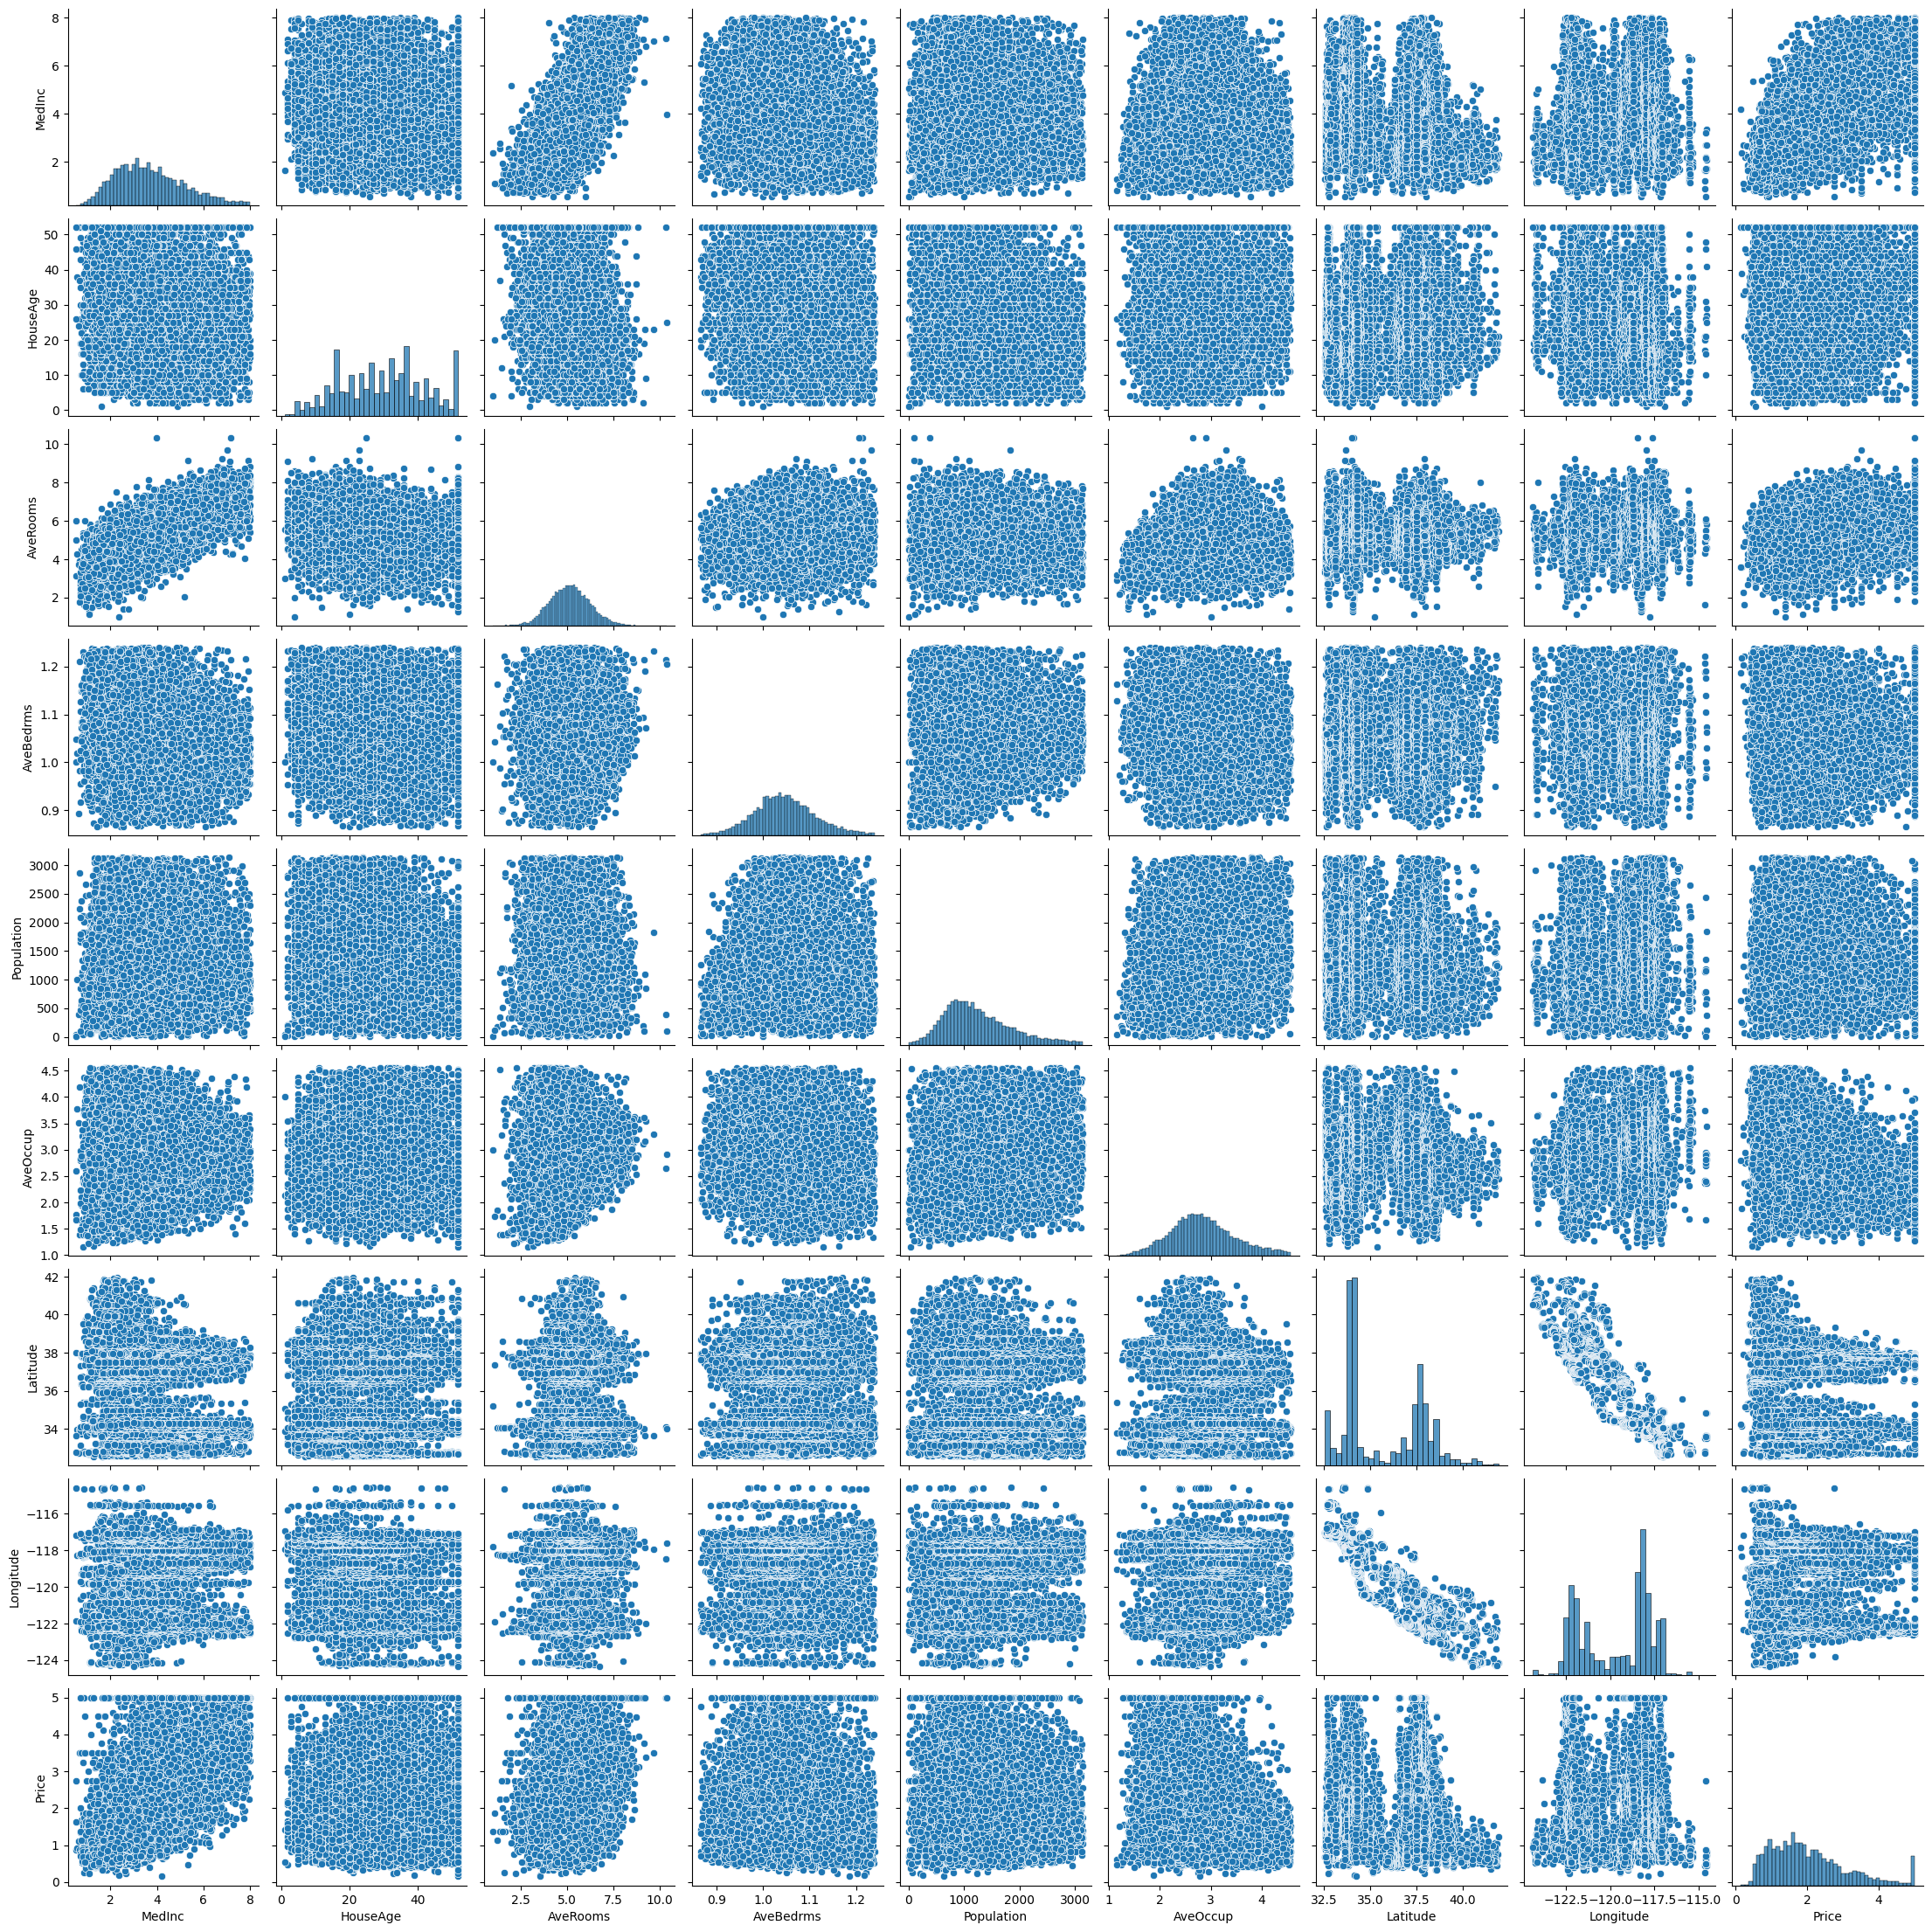

In [173]:
import seaborn as sns
sns.pairplot(dataset)

## Analyzing The Correlated Features

In [174]:
dataset.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.152103  0.700524  -0.236190   -0.020092 -0.052181   
HouseAge   -0.152103  1.000000 -0.196554  -0.068824   -0.273153 -0.027531   
AveRooms    0.700524 -0.196554  1.000000   0.003485   -0.073301  0.063581   
AveBedrms  -0.236190 -0.068824  0.003485   1.000000    0.079462 -0.096494   
Population -0.020092 -0.273153 -0.073301   0.079462    1.000000  0.212333   
AveOccup   -0.052181 -0.027531  0.063581  -0.096494    0.212333  1.000000   
Latitude   -0.082096  0.009680  0.121409   0.028740   -0.106895 -0.154413   
Longitude  -0.010496 -0.096276 -0.086792  -0.001355    0.101095  0.181674   
Price       0.628096  0.125071  0.256297  -0.055338   -0.038413 -0.320461   

            Latitude  Longitude     Price  
MedInc     -0.082096  -0.010496  0.628096  
HouseAge    0.009680  -0.096276  0.125071  
AveRooms    0.121409  -0.086792  0.256297  
AveBedrms   0.028740  -0.001355 -0.055338  
Population -0.106895   0.101095 -0.038413  
AveOccup   -0.154413   0.181674 -0.320461  
Latitude    1.000000  -0.933624 -0.147214  
Longitude  -0.933624   1.000000 -0.040576  
Price      -0.147214  -0.040576  1.000000

In [175]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16904 entries, 2 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16904 non-null  float64
 1   HouseAge    16904 non-null  float64
 2   AveRooms    16904 non-null  float64
 3   AveBedrms   16904 non-null  float64
 4   Population  16904 non-null  float64
 5   AveOccup    16904 non-null  float64
 6   Latitude    16904 non-null  float64
 7   Longitude   16904 non-null  float64
 8   Price       16904 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [176]:
dataset.drop(columns=['Longitude'], inplace= True)

In [177]:
dataset.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.152103  0.700524  -0.236190   -0.020092 -0.052181   
HouseAge   -0.152103  1.000000 -0.196554  -0.068824   -0.273153 -0.027531   
AveRooms    0.700524 -0.196554  1.000000   0.003485   -0.073301  0.063581   
AveBedrms  -0.236190 -0.068824  0.003485   1.000000    0.079462 -0.096494   
Population -0.020092 -0.273153 -0.073301   0.079462    1.000000  0.212333   
AveOccup   -0.052181 -0.027531  0.063581  -0.096494    0.212333  1.000000   
Latitude   -0.082096  0.009680  0.121409   0.028740   -0.106895 -0.154413   
Price       0.628096  0.125071  0.256297  -0.055338   -0.038413 -0.320461   

            Latitude     Price  
MedInc     -0.082096  0.628096  
HouseAge    0.009680  0.125071  
AveRooms    0.121409  0.256297  
AveBedrms   0.028740 -0.055338  
Population -0.106895 -0.038413  
AveOccup   -0.154413 -0.320461  
Latitude    1.000000 -0.147214  
Price      -0.147214  1.000000

Text(0, 0.5, 'Price')

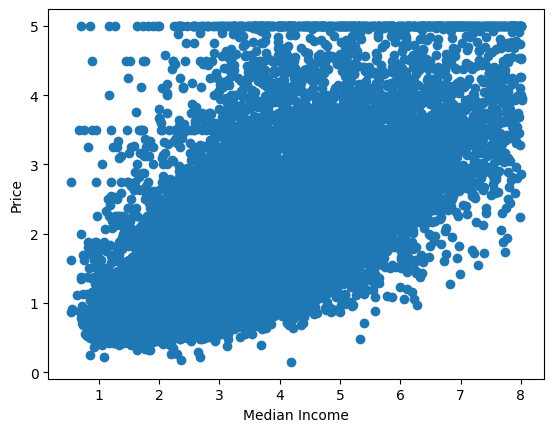

In [178]:
plt.scatter(dataset['MedInc'],dataset['Price'])
plt.xlabel("Median Income")
plt.ylabel("Price")

<Axes: xlabel='MedInc', ylabel='Price'>

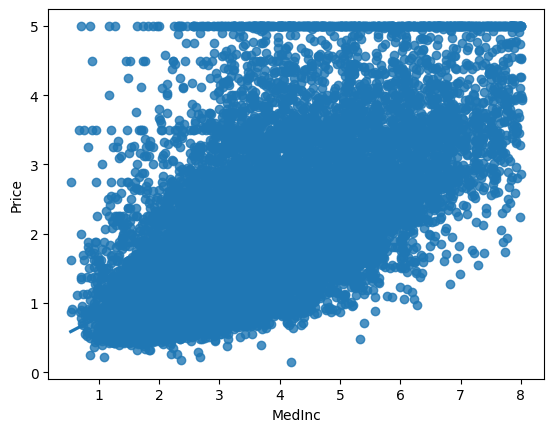

In [179]:
import seaborn as sns
sns.regplot(x="MedInc",y="Price",data=dataset)

In [180]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [181]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84

In [182]:
y.head()

2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
Name: Price, dtype: float64

# EDA

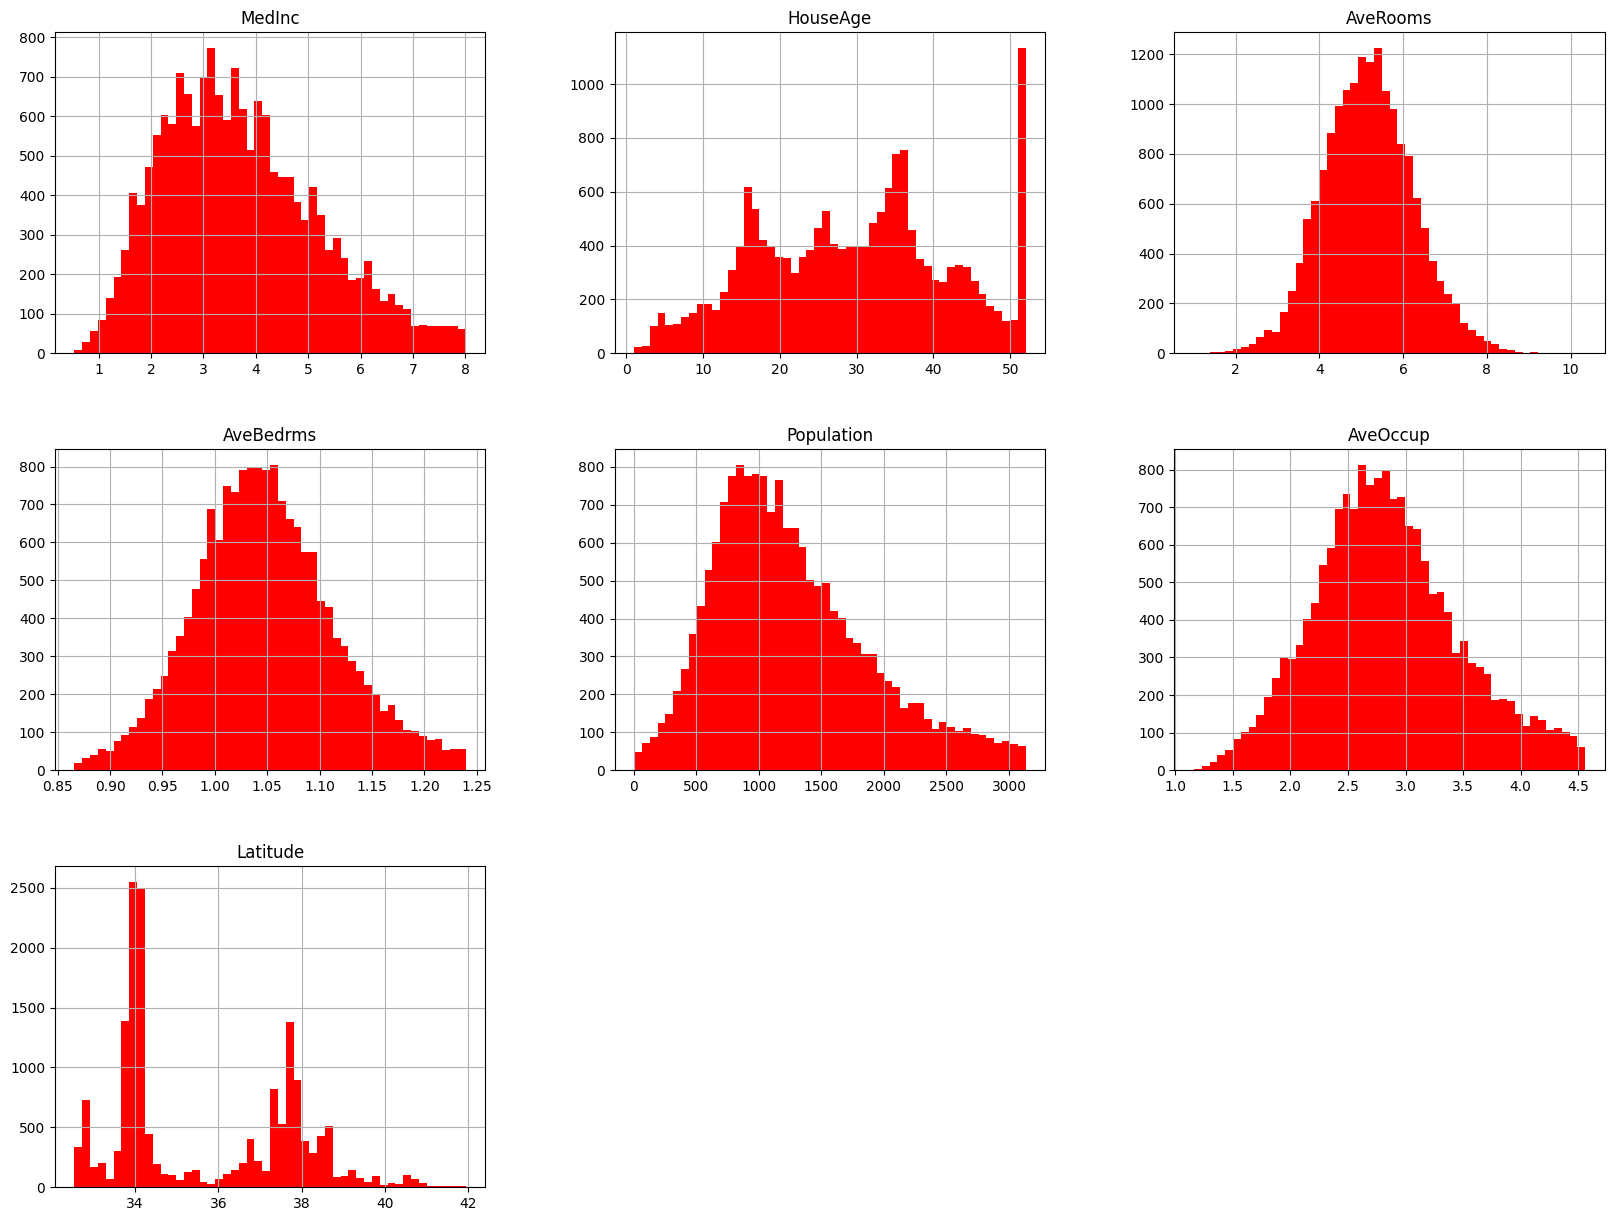

In [183]:
X.hist(bins = 50, figsize = (20,15), color = "red")
plt.show()

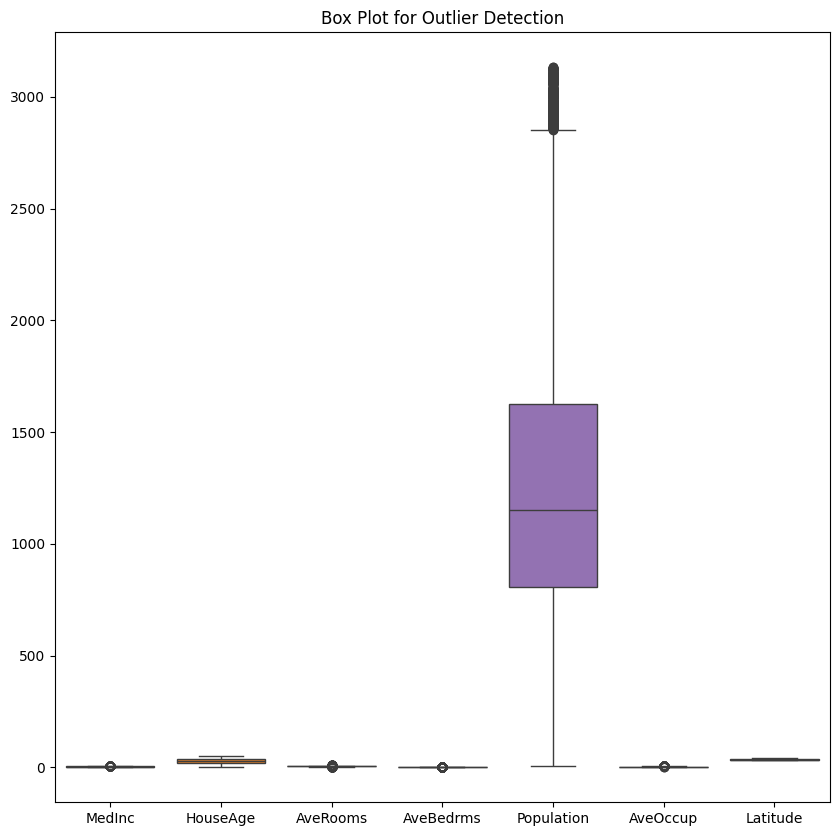

In [184]:
plt.figure(figsize=(10, 10))
sns.boxplot(X)
plt.title("Box Plot for Outlier Detection")
plt.show()

In [185]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [186]:
X = scaler.fit_transform(X)

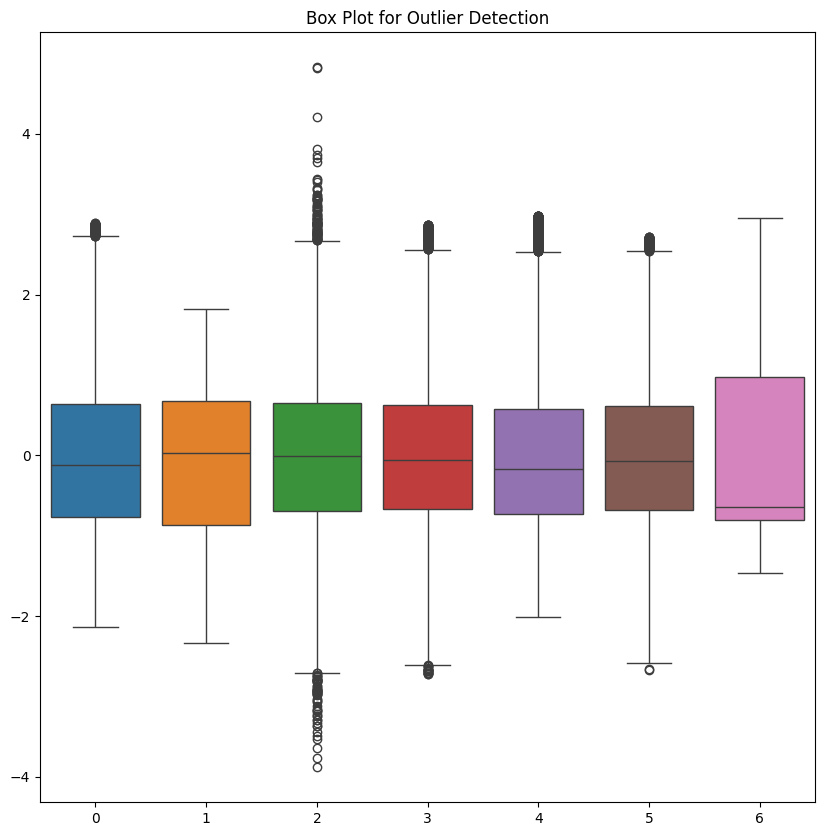

In [187]:
plt.figure(figsize=(10, 10))
sns.boxplot(X)
plt.title("Box Plot for Outlier Detection")
plt.show()

In [188]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [189]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [190]:
X_train

array([[-1.91306162,  1.81923405, -1.34330734, ..., -0.51177612,
         1.32884615, -0.71967026],
       [-0.54993929,  0.18980739,  0.54886803, ..., -0.89012444,
        -0.46925299,  2.33008885],
       [ 1.02765657, -0.95079128,  1.63474587, ...,  0.12199722,
         0.5355298 ,  1.21809976],
       ...,
       [-0.07076486,  1.41187739,  0.60681562, ..., -0.6315066 ,
         0.15443539, -0.6868267 ],
       [ 1.41161389, -0.95079128,  1.68942016, ...,  0.69670352,
         0.67231803,  0.95065934],
       [ 0.58601837,  0.18980739,  1.43768959, ..., -0.67141676,
        -0.1425987 ,  1.25563525]])

In [191]:
X_test

array([[ 0.33844043, -0.29902061,  1.27233561, ..., -1.01624055,
         0.11309164,  1.62629828],
       [-0.27899355, -0.38049195,  0.35799706, ..., -0.75762271,
         0.81208996,  1.16179651],
       [ 0.28143103,  0.35275005,  0.14095204, ...,  2.31865243,
         1.16216259, -0.74312995],
       ...,
       [-0.33445853, -1.03226262,  0.28350707, ..., -1.24452666,
        -1.08404601, -0.47568953],
       [ 0.96305935, -1.11373395,  1.56700407, ..., -0.34574986,
        -0.71144138, -1.29208659],
       [-0.80000173,  0.10833605, -0.93872847, ...,  0.51152038,
         0.87815238, -0.69621058]])

## Model Training

In [192]:
from sklearn.linear_model import LinearRegression

In [193]:
regression=LinearRegression()

In [194]:
regression.fit(X_train,y_train)

LinearRegression()

In [195]:
## print the coefficients and the intercept
print(regression.coef_)

[ 0.9419787   0.24181434 -0.30359129  0.15015727  0.0503507  -0.27942501
 -0.08824832]


In [196]:
print(regression.intercept_)

2.028881771527015


In [197]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [198]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [199]:
reg_pred

array([1.43988865, 1.42486507, 1.98546717, ..., 2.0846074 , 2.41972671,
       1.50864427])

## Assumptions

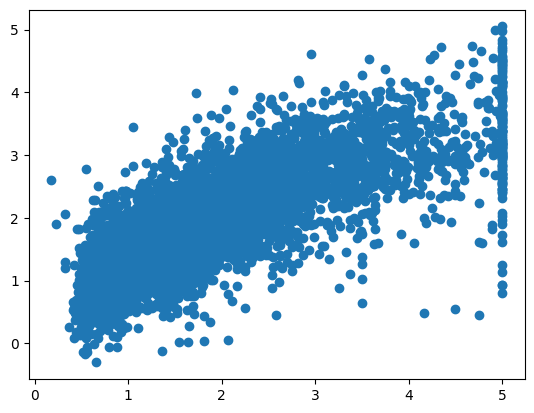

In [200]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [201]:
## Residuals
residuals=y_test-reg_pred

In [202]:
residuals

19694   -0.497889
16471   -0.513865
6034    -0.635467
9915     0.496065
6215    -0.597008
           ...   
6247     0.314099
14460    3.073578
17437   -0.959607
15199   -0.576727
3761     0.486356
Name: Price, Length: 5072, dtype: float64

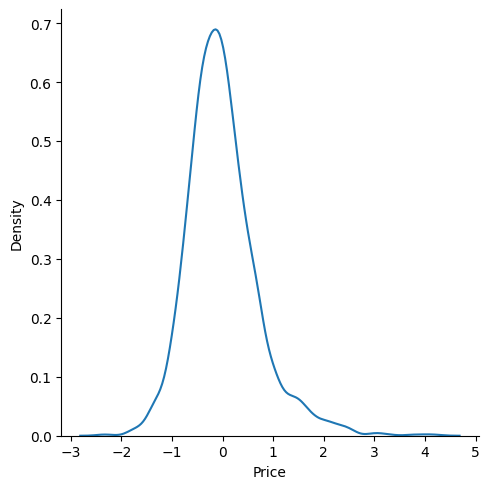

In [203]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

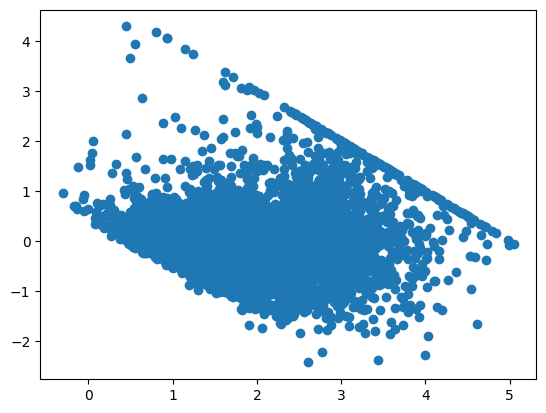

In [204]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [205]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5198235161151654
0.49458281759088596
0.7032658228514208


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [206]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5752774398656543


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [209]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5746903431198129

## New Data Prediction

In [214]:
dataset.drop(columns=['Price']).iloc[0].values.reshape(1, -1)

array([[  7.2574    ,  52.        ,   8.28813559,   1.07344633,
        496.        ,   2.80225989,  37.85      ]])

In [215]:
##transformation of new data
scaler.transform(dataset.drop(columns=['Price']).iloc[0].values.reshape(1, -1))

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.3788264 ,  1.81923405,  2.90529728,  0.38162395, -1.22536979,
        -0.06756349,  1.03042227]])

In [216]:
regression.predict(scaler.transform(dataset.drop(columns=['Price']).iloc[0].values.reshape(1, -1)))

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.7511308])

## Pickling The Model file For Deployment

In [217]:
import pickle

In [218]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [219]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [220]:
## Prediction
pickled_model.predict(scaler.transform(dataset.drop(columns=['Price']).iloc[0].values.reshape(1, -1)))

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.7511308])